<h1 style="color:royalblue; font-size:48px;" align="center"><b>Time Series Analysis And Prediction</b></h1>



<h1 style="color:royalblue; font-size:48px;" align="center"><b>(Stock Price Prediction)</b></h1>

<h1 style="color:black" align="center">by Subhajit Nath</h1>

<h1 style="color:royalblue;">Introduction</h1>

Time plays a very important role when it comes to buiness.Each second is money every national and global economies depends on time. Time series analysis have become a widely used tool in the field of analytics inorder to understand a variable which depends on time.

<h1 style="color:royalblue;">Time Series Analysis</h1>


Time series analysis is a statistical technique that deals with time series data, or trend analysis. Time series data means that data is in a series of particular time periods or intervals.
Incorporating time series analysis into our machine learning project, we explore patterns and trends over time to make predictions. By leveraging historical data, our model aims to uncover insights crucial for forecasting future outcomes, enabling data-driven decision-making in diverse fields such as finance, healthcare, and environmental monitoring.

<h2 style="color:royalblue;">Components of Time Series</h2>

Time series data consist of four components:

 * Trend Component: This is a variation that moves up or down in a reasonably predictable pattern over a long period.

 * Seasonality Component: is the variation that is regular and periodic and repeats itself over a specific period such as a day, week, month, season, etc.,

 * Cyclical Component: is the variation that corresponds with business or economic 'boom-bust' cycles or follows their own peculiar cycles, and

 * Random Component: is the variation that is erratic or residual and does not fall under any of the above three classifications.


![](https://itfeature.com/wp-content/uploads/2014/06/Component-of-Time-Series-Data.jpg )

<h1 style="color:royalblue;">DATASET - NIFTY 50</h1>

The data is the price history and trading volumes of the fifty stocks in the index NIFTY 50 from NSE (National Stock Exchange) India. All datasets are at a day-level with pricing and trading values split across .cvs files for each stock along with a metadata file with some macro-information about the stocks itself. The data spans from 1st January, 2000 to 31st July, 2020.

The NIFTY 50 index National Stock Exchange of India's benchmark broad based stock market index for the Indian equity market. Full form of NIFTY is National Index Fifty. It represents the weighted average of 50 Indian company stocks in 13 sectors and is one of the two main stock indices used in India, the other being the BSE Sensex.

Nifty is owned and managed by India Index Services and Products (IISL), which is a wholly owned subsidiary of the NSE Strategic Investment Corporation Limited. IISL had a marketing and licensing agreement with Standard and Poor's for co-branding equity indices until 2013. The Nifty 50 was launched 1 April 1996, and is one of the many stock indices of Nifty.

<h1 style="color:royalblue;">HDFC BANK</h1>
<img src="https://1000logos.net/wp-content/uploads/2021/06/HDFC-Bank-logo-768x432.png">

The Housing Development Finance Corporation Limited or HDFC Ltd was among the first financial institutions in India to receive an “in principle” approval from the Reserve Bank of India (RBI) to set up a bank in the private sector. This was done as part of RBI’s policy for liberalisation of the Indian banking industry in 1994.

HDFC Bank was incorporated in August 1994 in the name of HDFC Bank Limited, with its registered office in Mumbai, India. The bank commenced operations as a Scheduled Commercial Bank in January 1995.


On April 4, 2022 the merger of India’s largest Housing Finance Company, HDFC Limited and the largest private sector bank in India, HDFC Bank was announced. HDFC Ltd, over the last 45 years has developed one of the best product offerings making it a leader in the housing finance business. HDFC Bank enables seamless delivery of home loans as a part of its wide product suite catering to urban, semi urban and rural India.

<h1 style="color:royalblue;">Acknowledgements</h1>

1. Time Series Using Pandas- [parulpandey](https://www.kaggle.com/parulpandey/getting-started-with-time-series-using-pandas)
2. Time Series Notebook- [rohanrao](https://www.kaggle.com/rohanrao/a-modern-time-series-tutorial)
3. The AUTO ARIMA model - [Vopani](https://www.kaggle.com/rohanrao/a-modern-time-series-tutorial)
4. Prophet documentation - [Facebook](http://facebook.github.io/prophet/docs/quick_start.html)

<h1 style="color:royalblue;">Project summary</h1>

The project revolves around analysing the the closing price and Volume-weighted average price of HDFC BANK's stock changes in time. It starts with preparing the data for visualizations and goes on with an extensive exploratory data analysis and followed by time series model building.

<h1 style="color:royalblue;">Objectives of the project</h1>

1. Data Preparation
2. Data Visualization
3. Building a time series model

## Import libraries

In [69]:
#Basic Libraries
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime    
from pandas import Series 
import statsmodels.api as sm

#Visualization libraries
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
sns.set_style("whitegrid")
%matplotlib inline

from prophet import Prophet
from matplotlib import pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [168]:
hdfc=pd.read_csv(r"C:\Users\Subhajit Nath\Documents\DataSets\HDFCBANK.csv")

In [72]:
hdfc.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN


In [73]:
## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(hdfc.shape))
print (hdfc.info())

The shape of the  data is (row, column):(5306, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: f

## Dataset Details


Description of columns in the file:

* Date - Date of trade
* symbol - Name of the company (Reliance)
* Series - We have only one series(EQ): It stands for Equity. In this series intraday trading is possible in addition to delivery
* Prev Close - Refers to the prior day's final price of a security when the market officially closes for the day.
* Open - The open is the starting period of trading on a securities exchange or organized over-the-counter market.
* High -  Highest price at which a stock traded during the course of the trading day.
* Low - Lowest price at which a stock traded during the course of the trading day.
* Last - The last price of a stock is just one price to consider when buying or selling shares. The last price is simply the most recent one
* Close - The close is a reference to the end of a trading session in the financial markets when the markets close for the day. 
* VWAP(Volume-weighted average price)- It is the ratio of the value traded to total volume traded over a particular time horizon. It is a measure of the average price at which a stock is traded over the trading horizon
* Volume - It is the amount of a security that was traded during a given period of time
* Turnover -It is a measure of sellers versus buyers of a particular stock. It is calculated by dividing the daily volume of a stock by the "float" of a stock, which is the number of shares available for sale by the general trading public.
* Trades- The number of shares being traded on a given day is called trading volumes
* Deliverabe Volume -  quantity of shares which actually move from one set of people (who had those shares in their demat account before today and are selling today) to another set of people (who have purchased those shares 
* %Deliverable - shares which are actually transferred from one person's to another's demat account.

In [74]:
#Checking out the statistical measures
hdfc.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,1007.093884,1007.472767,1019.986939,993.822211,1007.364003,1007.330390,1006.929263,2.102580e+06,2.448837e+14,82923.625407,1.261883e+06,0.595003
std,635.757762,635.461516,641.444674,629.502818,635.722752,635.675021,635.481917,3.970048e+06,4.778103e+14,93575.061741,2.070127e+06,0.121337
min,157.400000,162.150000,167.900000,157.000000,163.000000,163.400000,161.400000,1.042000e+03,2.291142e+10,807.000000,4.631000e+03,0.177900
25%,479.912500,482.112500,486.912500,473.100000,480.700000,480.200000,479.512500,3.058325e+05,1.640025e+13,26850.500000,2.624830e+05,0.517800
50%,934.750000,939.350000,953.950000,922.175000,935.600000,935.725000,937.455000,9.444650e+05,1.150443e+14,44227.000000,6.271970e+05,0.600200
75%,1421.000000,1423.525000,1440.000000,1399.000000,1422.812500,1421.000000,1420.567500,2.123647e+06,2.154477e+14,104139.250000,1.433151e+06,0.674000
max,2565.800000,2566.000000,2583.300000,2553.700000,2563.000000,2565.800000,2570.700000,1.005650e+08,1.426400e+16,790631.000000,6.669683e+07,1.000000


<font size="+3" color='deeppink'><b>Data preparation</b></font>

Inorder for our machine learning algorithm to perform well, we need to cleanse our data. In our case, we don't have much garbage to clean except few null values. Also let's also extract few more features from the time to perform indepth EDA

### Converting Date into DateTime format

In [75]:
#Creating a copy
hdfc_copy=hdfc.copy()

#Coverting date column to datetime data type
hdfc_copy['Date'] = hdfc_copy['Date'].apply(pd.to_datetime)

#Extracting Month, Week, Day,Day of week
hdfc_copy["Month"] = hdfc_copy.Date.dt.month
hdfc_copy["Week"] = hdfc_copy.Date.dt.week
hdfc_copy["Day"] = hdfc_copy.Date.dt.day
hdfc_copy["Day of week"] = hdfc_copy.Date.dt.dayofweek


#Setting date column as index
hdfc_copy.set_index("Date", drop=False, inplace=True)
hdfc_copy.iloc[:,15:19].head()

,Month,Week,Day,Day of week
Date,,,,
2000-01-03,1,1,3,0
2000-01-04,1,1,4,1
2000-01-05,1,1,5,2
2000-01-06,1,1,6,3
2000-01-07,1,1,7,4


In [76]:
hdfc_copy.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Month,Week,Day,Day of week
Date,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN,1,1,3,0
2000-01-04,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN,1,1,4,1
2000-01-05,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN,1,1,5,2
2000-01-06,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN,1,1,6,3
2000-01-07,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN,1,1,7,4


In [77]:
#Checking for null values
hdfc_copy.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
Month                    0
Week                     0
Day                      0
Day of week              0
dtype: int64

In [78]:
#Imputing null values with mean 
hdfc_copy.fillna(hdfc_copy.mean(),inplace=True)




<font size="+3" color='deeppink'><b>Exploratory Data Analysis</b></font>

Exploratory data analysis is a great way of understanding and analyzing the data sets. The EDA technique is extensively used by data scientists and data analysts to summarize the main characteristics of data sets and to visualize them through different graphs and plots. It helps data scientists to search for patterns, spot anomalies, or check assumptions.

EDA ensures that results are valid and applicable as per the business goals. Once the EDA task is completed, its features can be used for efficient and better data analysis, modelling, and machine learning.

### Plotting VWAP(Volume Weighted Average Price) over time

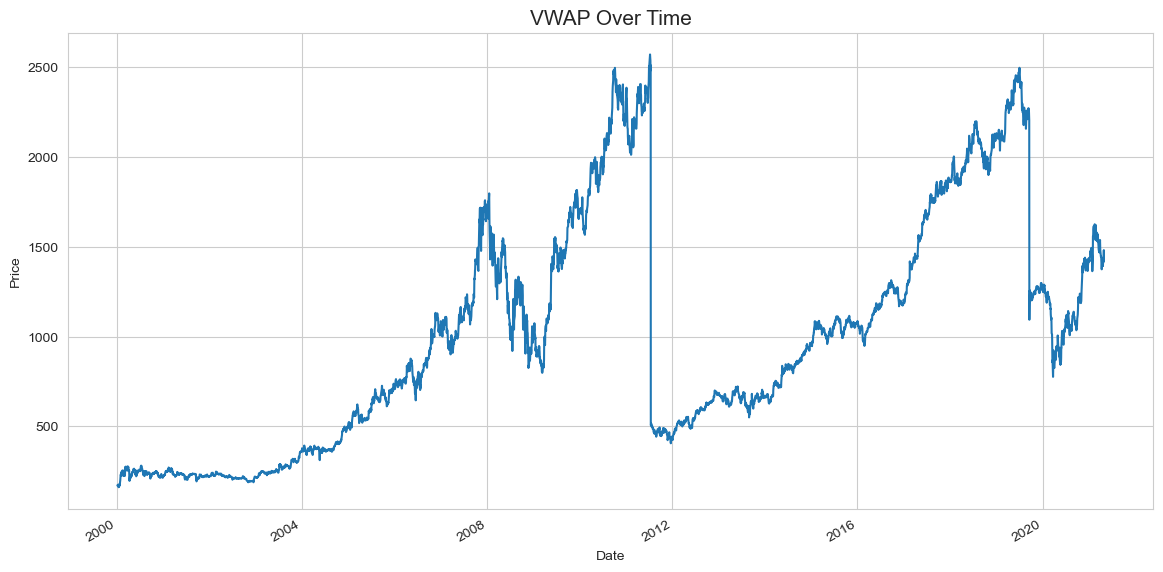

In [151]:
hdfc.VWAP.plot(figsize=(14, 7))
plt.title('VWAP Over Time', fontsize=15)
plt.ylabel('Price');

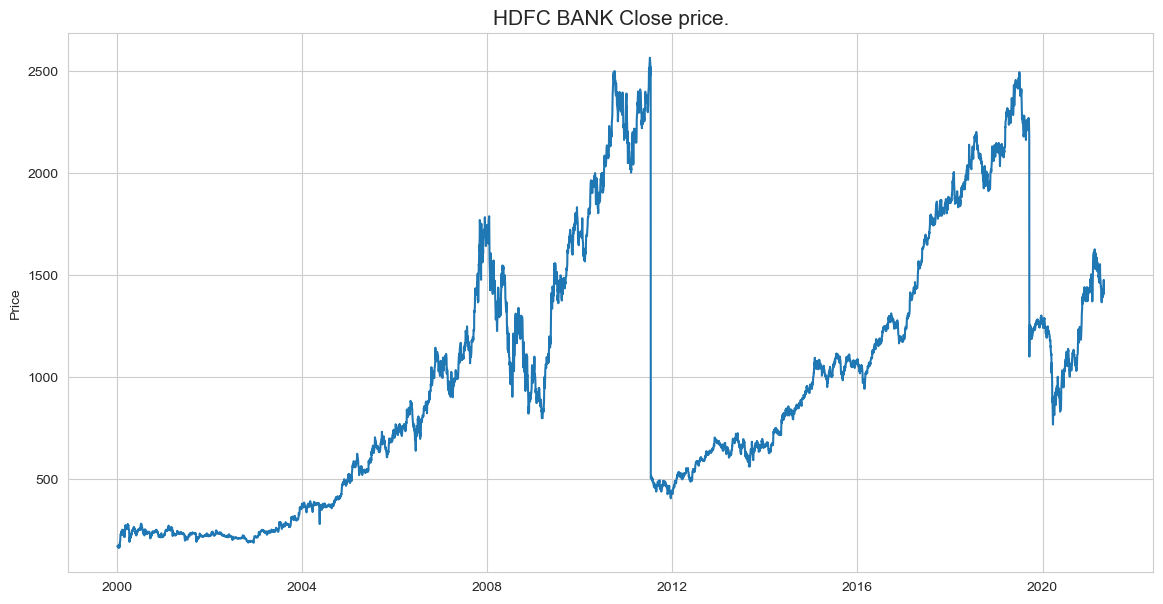

In [152]:
plt.figure(figsize=(14,7))
plt.plot(hdfc_copy['Close'])
plt.title('HDFC BANK Close price.', fontsize=15)
plt.ylabel('Price')
plt.show()

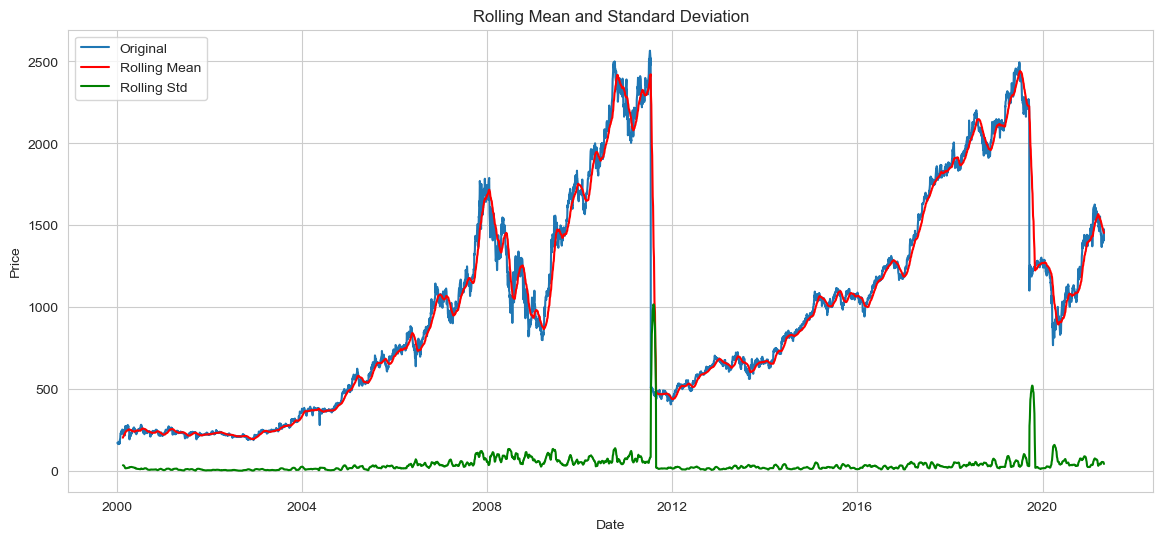

In [82]:
# Rolling mean and standard deviation
rolling_mean = hdfc_copy['Close'].rolling(window=30).mean()
rolling_std = hdfc_copy['Close'].rolling(window=30).std()

plt.figure(figsize=(14, 6))
plt.plot(hdfc_copy['Close'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='r')
plt.plot(rolling_std, label='Rolling Std', color='g')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

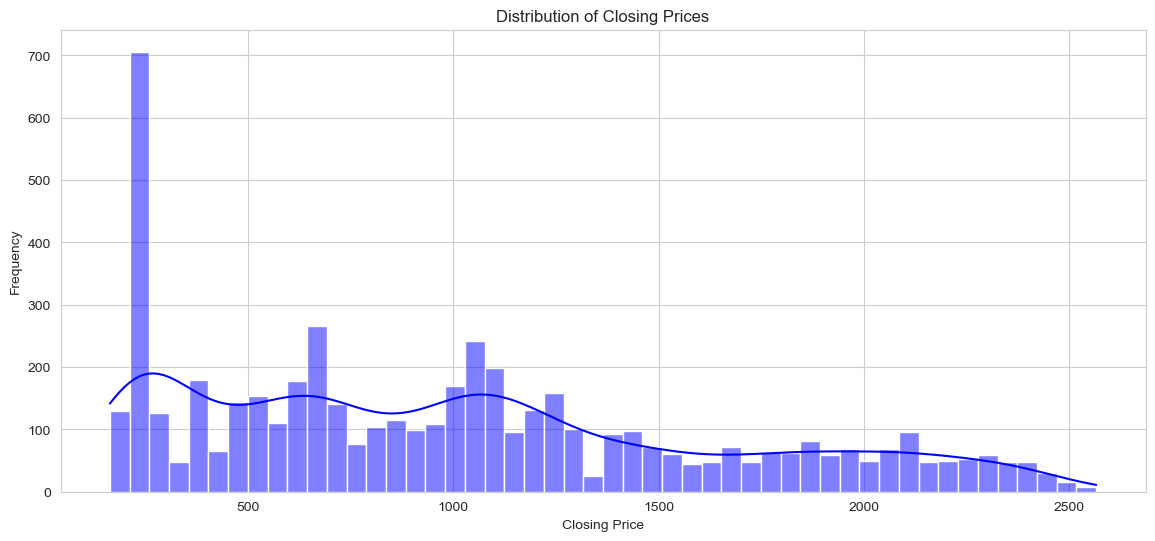

In [83]:
# Distribution plot of the closing prices
plt.figure(figsize=(14, 6))
sns.histplot(hdfc_copy['Close'], kde=True, bins=50, color='blue')
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

### Open and Close Stock Price

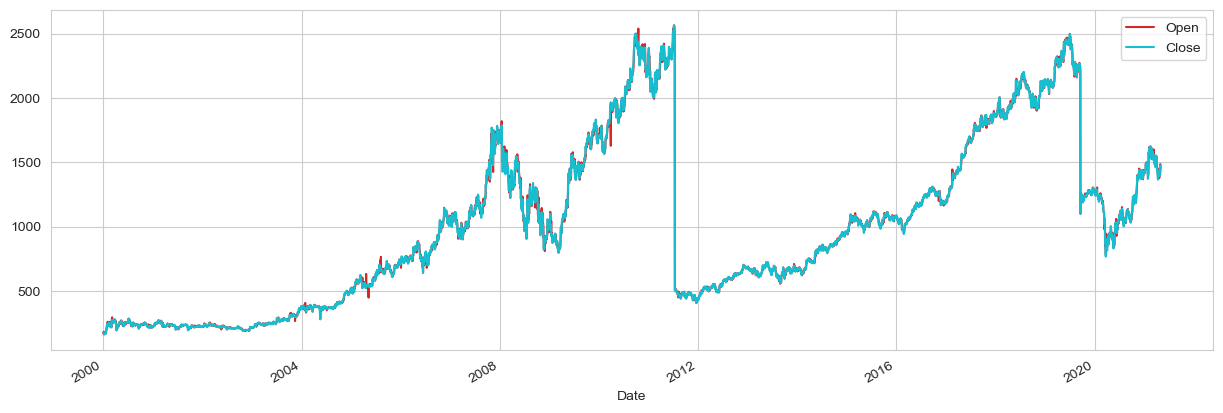

In [84]:
fig,ax = plt.subplots(figsize=(15,5))
hdfc_copy.plot(ax=ax,x='Date',y='Open',color=color_pal[3])
hdfc_copy.plot(ax=ax,x='Date',y='Close',color=color_pal[9])
plt.show()

### Open,close,High,low prices over time

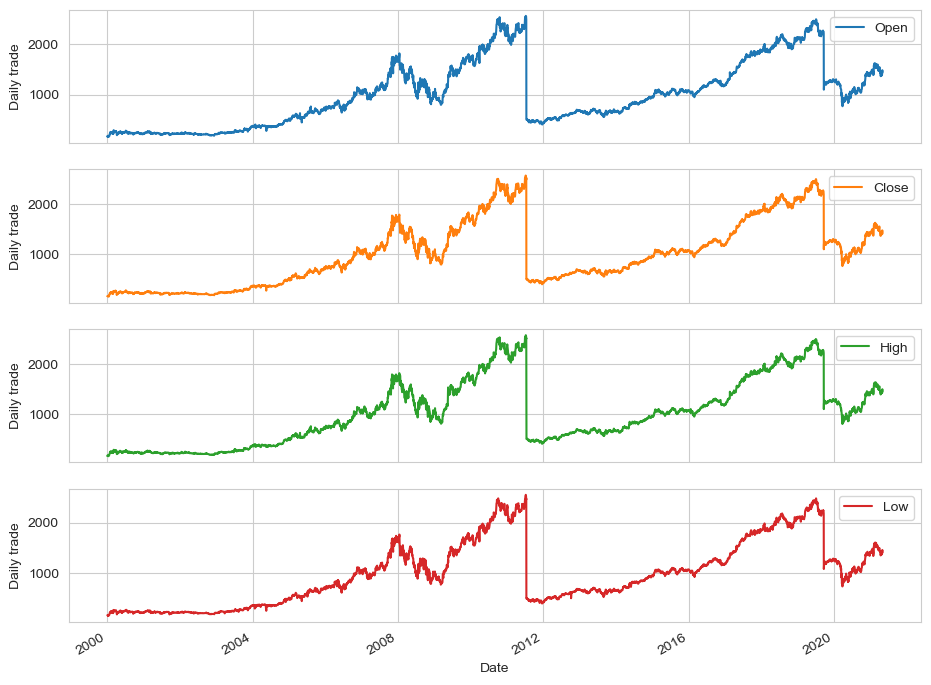

In [85]:
cols_plot = ['Open', 'Close', 'High','Low']
axes = hdfc_copy[cols_plot].plot(figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

### Volume over Time

In [86]:
fig = go.Figure([go.Scatter(x=hdfc_copy.index, y=hdfc_copy['Volume'])])
fig.update_layout(
    autosize=False,
    width=950,
    height=500,
    template='simple_white',
    title='Volume over time'
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Volume")
fig.show()

<font size="+3" color='deeppink'><b>Stationarity</b></font>

<img src="https://miro.medium.com/max/1147/1*xdblkZyg6YmmReAkZHUksw.png">
A common assumption in many time series techniques is that the data are stationary. A stationary process has the property that the mean, variance and autocorrelation structure do not change over time. Stationarity can be defined in precise mathematical terms, but for our purpose we mean a flat looking series, without trend, constant variance over time, a constant autocorrelation structure over time and no periodic fluctuations (seasonality).

There are two ways you can check the stationarity of a time series. The first is by looking at the data. By visualizing the data it should be easy to identify a changing mean or variation in the data. For a more accurate assessment there is the Dickey-Fuller test. I won’t go into the specifics of this test, but if the ‘Test Statistic’ is greater than the ‘Critical Value’ than the time series is stationary,Also we can check the pvalue. Below is code that will help you visualize the time series and test for stationarity.

### Visually checking for stationarity

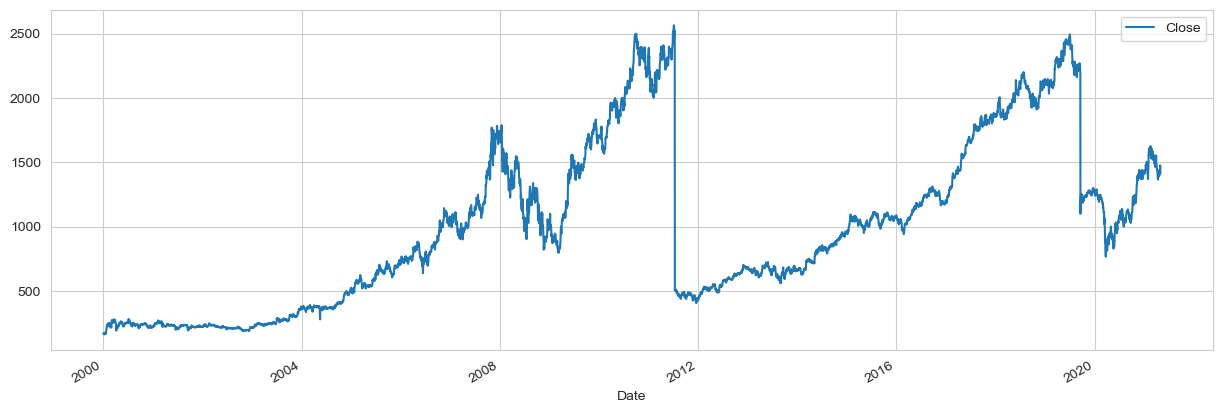

In [87]:
hdfc_stationarity=hdfc_copy[['Close']]

hdfc_stationarity.plot(figsize=(15, 5), subplots=True);

From the plotted graph we can say that the data doesn't have a constant average as there are meany leaps and troughs and also the variance is also different at different stages of the data. So our data is not stationary. We can also mathematically test for stationarity with adfuller test

## Augmented Dickey Fuller Test

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend. There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

* Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
* Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [88]:
from statsmodels.tsa.stattools import adfuller

test_result=adfuller(hdfc_stationarity['Close'])

#Ho: Data is non stationary
#H1: Data is stationary

def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(hdfc_stationarity['Close'])

ADF Test Statistic : -2.2957292911379663
p-value : 0.17334905995747601
#Lags Used : 0
Number of Observations Used : 5305
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Since our p value is greater than 0.05 we need to accept the null hypothesis which states that our data is non-stationary.

* We don't actually need to convert the time series data into stationary data.

## Convert Stationary into Non Stationary

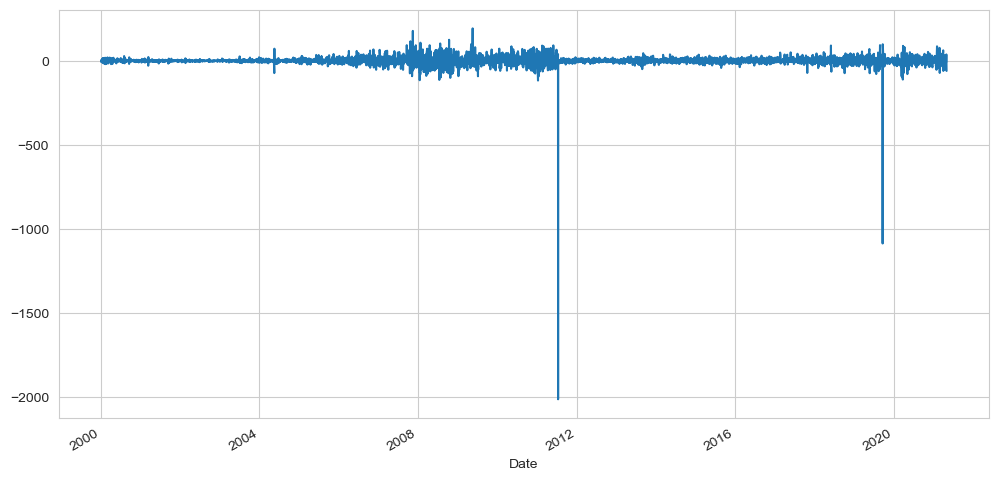

In [89]:
hdfc_stationarity['Close First Difference']=hdfc_stationarity['Close']-hdfc_stationarity['Close'].shift(1)
hdfc_stationarity['Close First Difference'].plot(figsize = (12,6));

### Seasonal Decompose

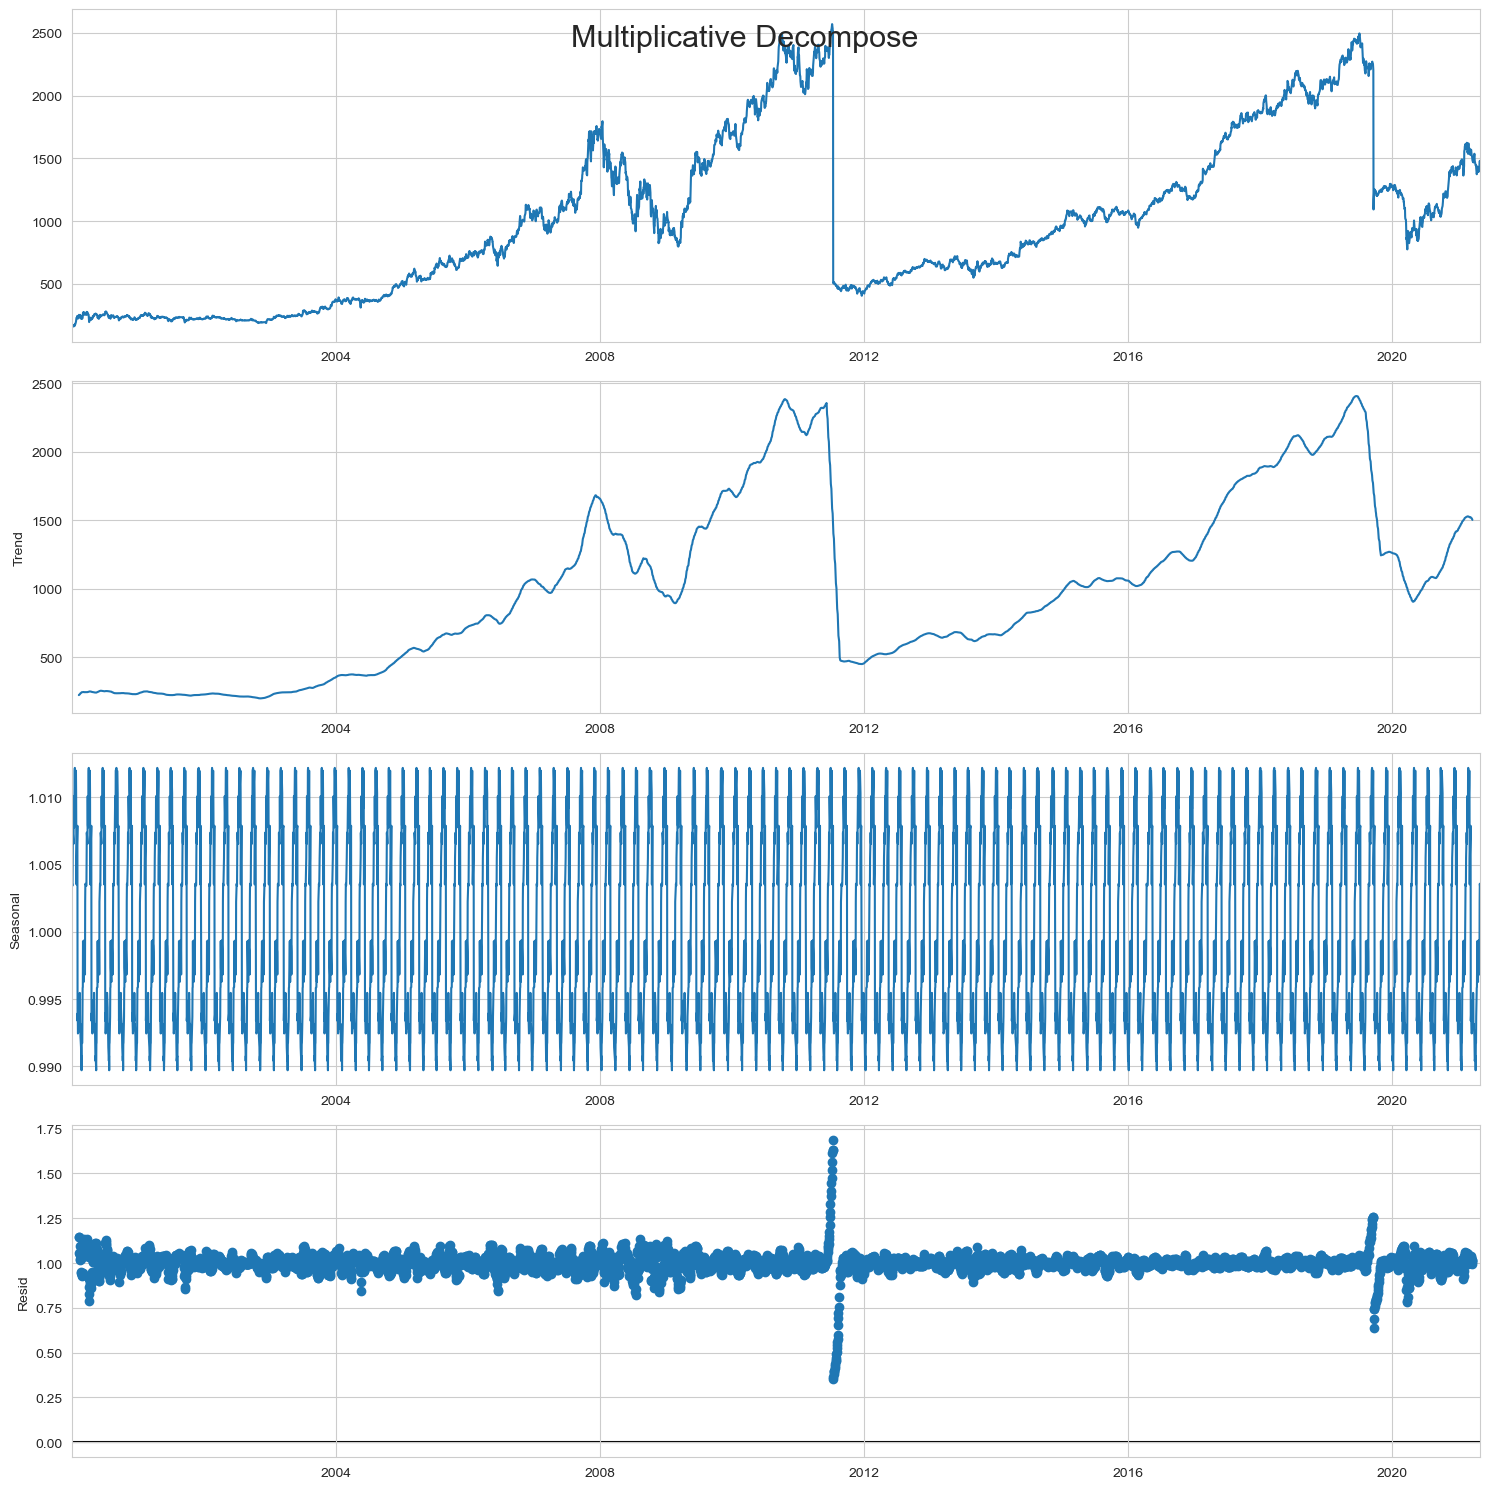

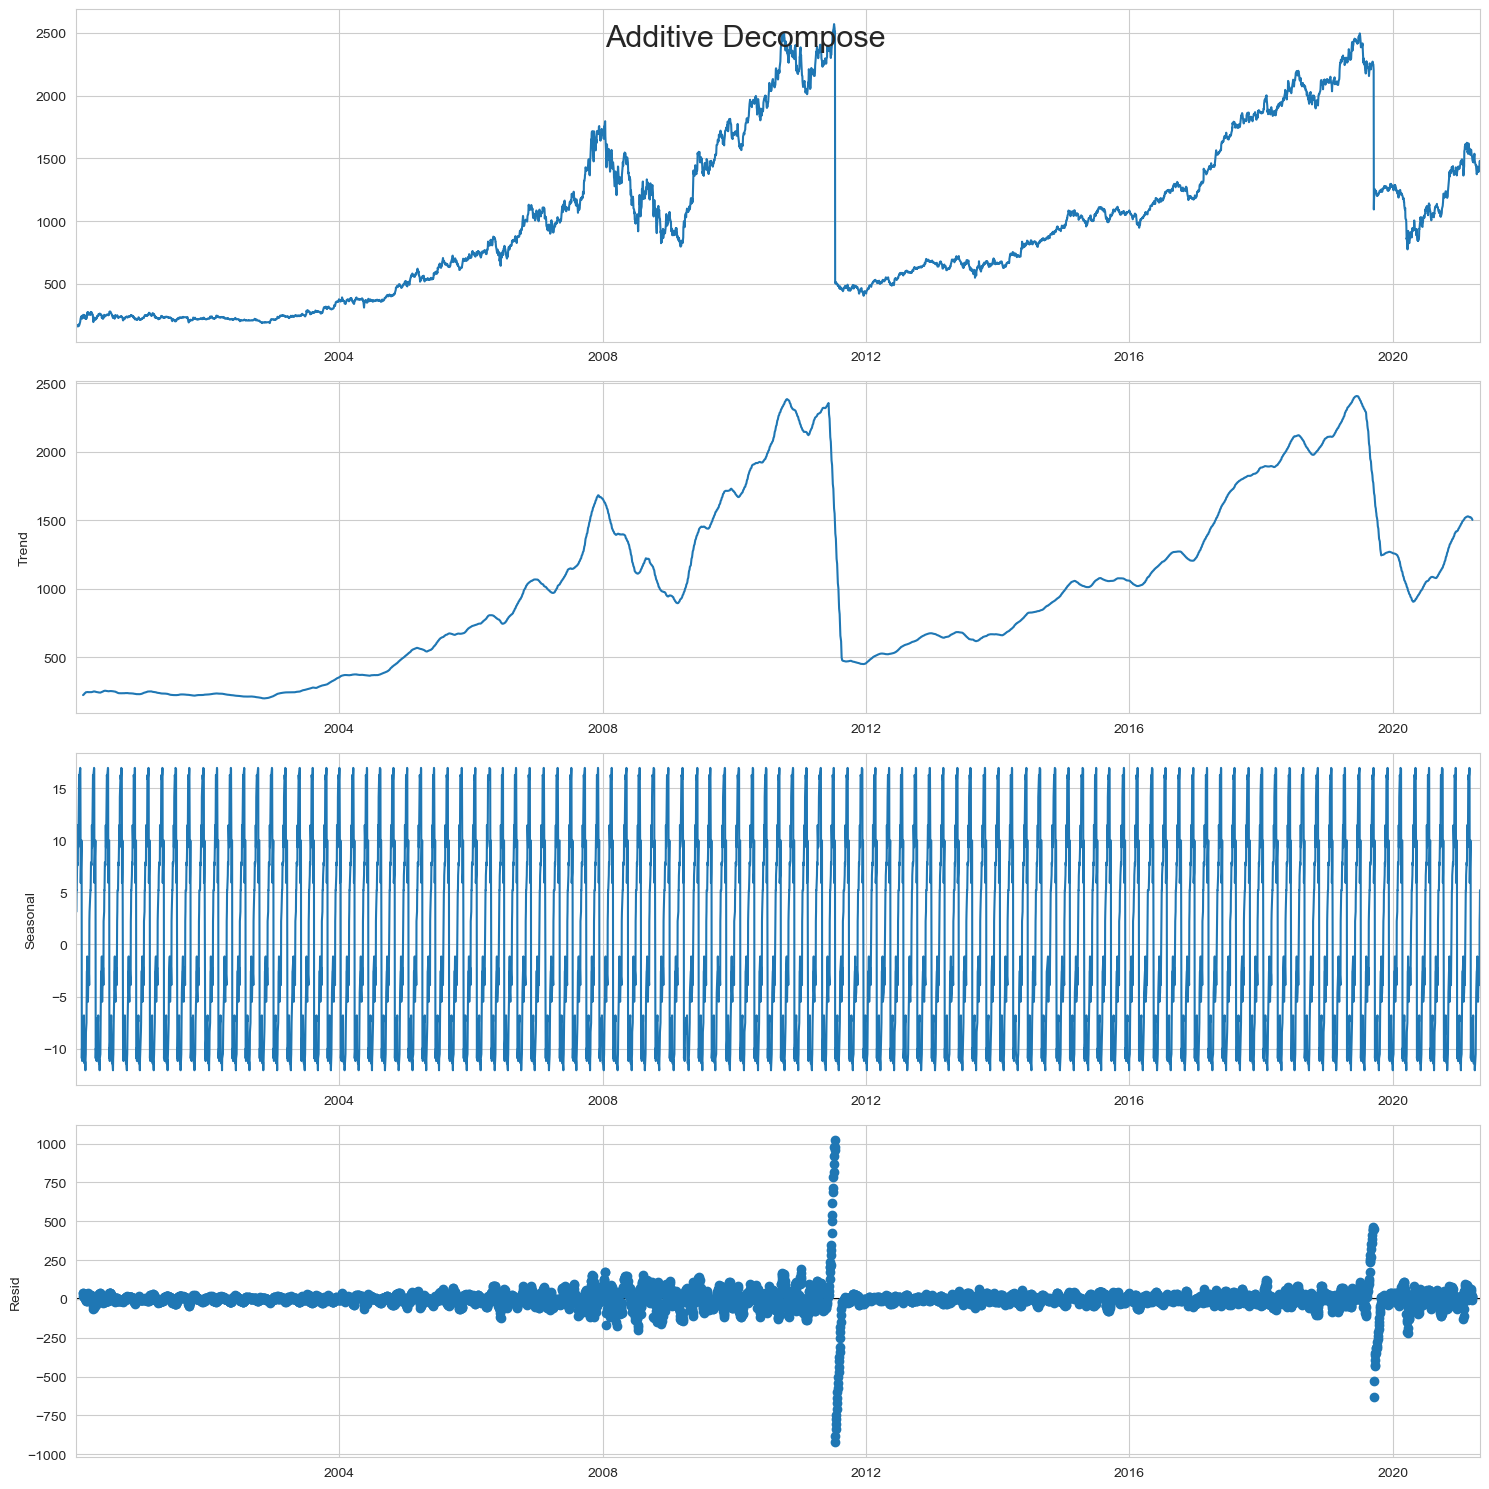

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

plt.rcParams.update({'figure.figsize': (18,18)})
y = hdfc_copy['VWAP'].to_frame()


# Multiplicative Decomposition 
result_mul = seasonal_decompose(y, model='multiplicative',period = 52)

# Additive Decomposition
result_add = seasonal_decompose(y, model='additive',period = 52)

# Plot
plt.rcParams.update({'figure.figsize': (15,15)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

## Moving Average (MA)

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks or any time period the trader chooses.

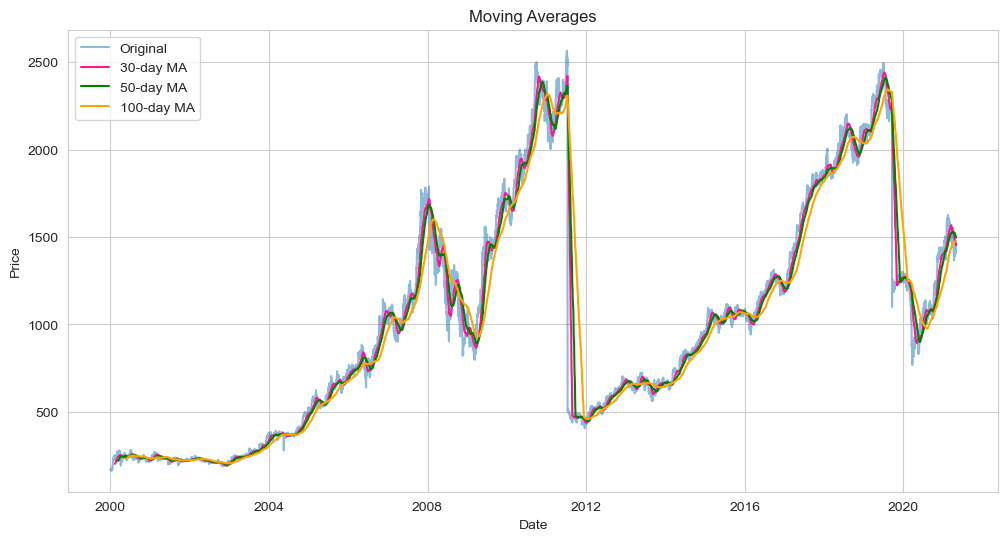

In [91]:
# Compute moving averages for 30, 50, and 100 days
hdfc_copy['30_day_MA'] = hdfc_copy['Close'].rolling(window=30).mean()
hdfc_copy['50_day_MA'] = hdfc_copy['Close'].rolling(window=50).mean()
hdfc_copy['100_day_MA'] = hdfc_copy['Close'].rolling(window=100).mean()

# Plot moving averages
plt.figure(figsize=(12, 6))
plt.plot(hdfc_copy['Close'], label='Original', alpha=0.5)
plt.plot(hdfc_copy['30_day_MA'], label='30-day MA', color='deeppink')
plt.plot(hdfc_copy['50_day_MA'], label='50-day MA', color='green')
plt.plot(hdfc_copy['100_day_MA'], label='100-day MA', color='orange')
plt.legend(loc='best')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Autocorrelation and Partial Autocorrelation

Auto-Correlation function gives us values of auto-correlation of any series with its lagged values. We plot these values along with the confidence band and tada! We have an ACF plot. In simple terms, it describes how well the present value of the series is related with its past values.

Partial Auto-Correlation function- Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation.

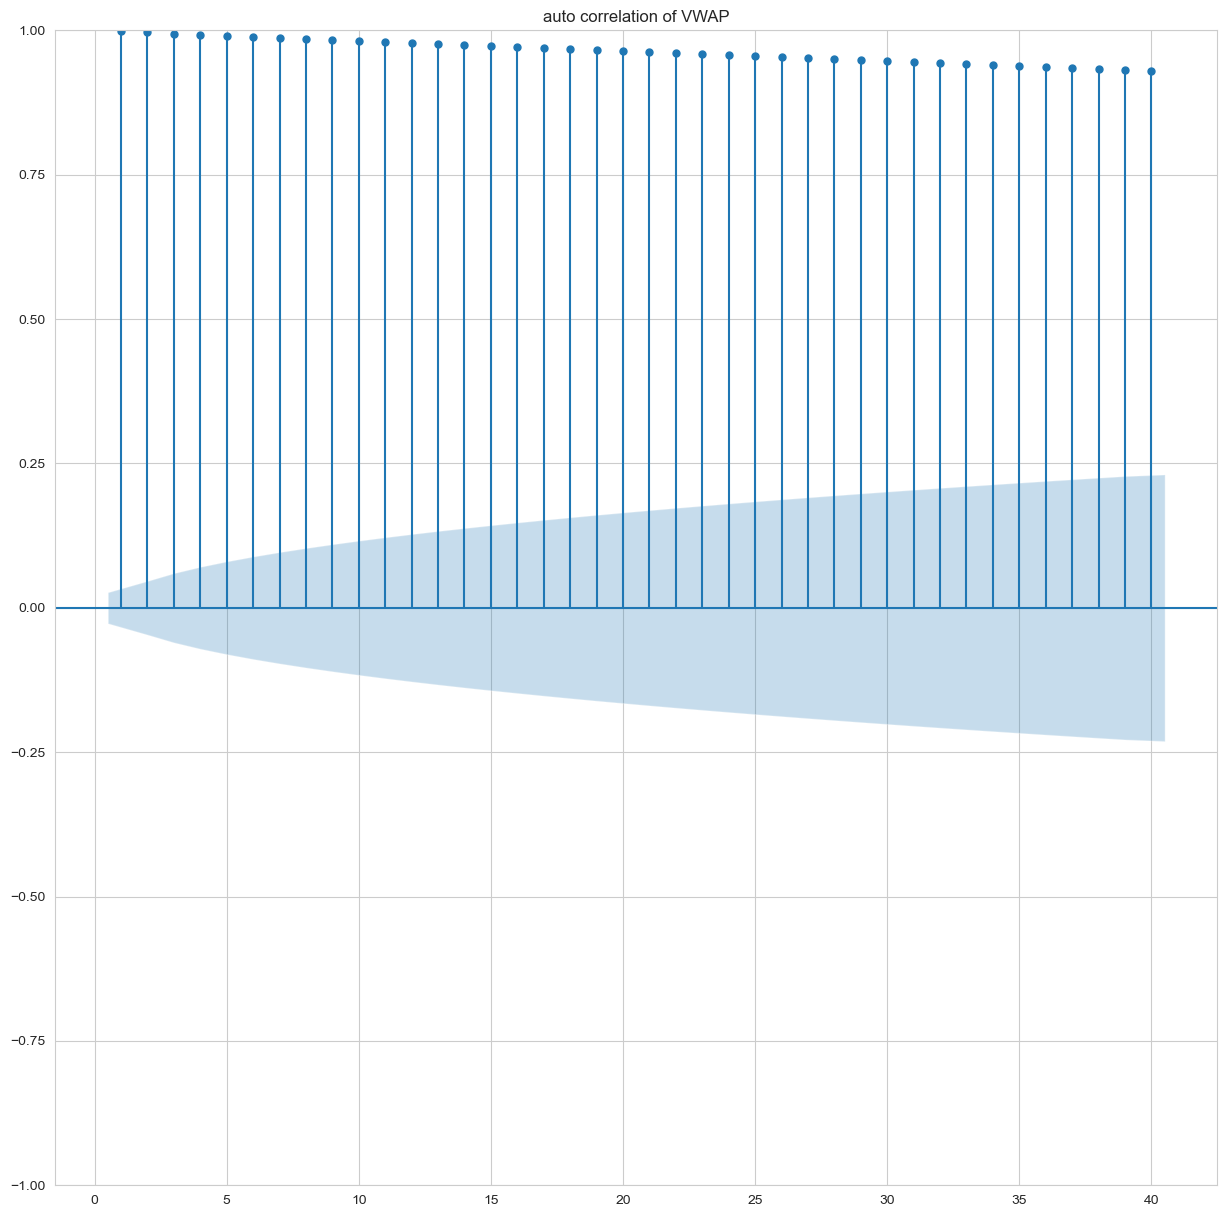

In [92]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(hdfc_copy['VWAP'].iloc[1:], lags=40,title='auto correlation of VWAP',zero=False)
plt.show()

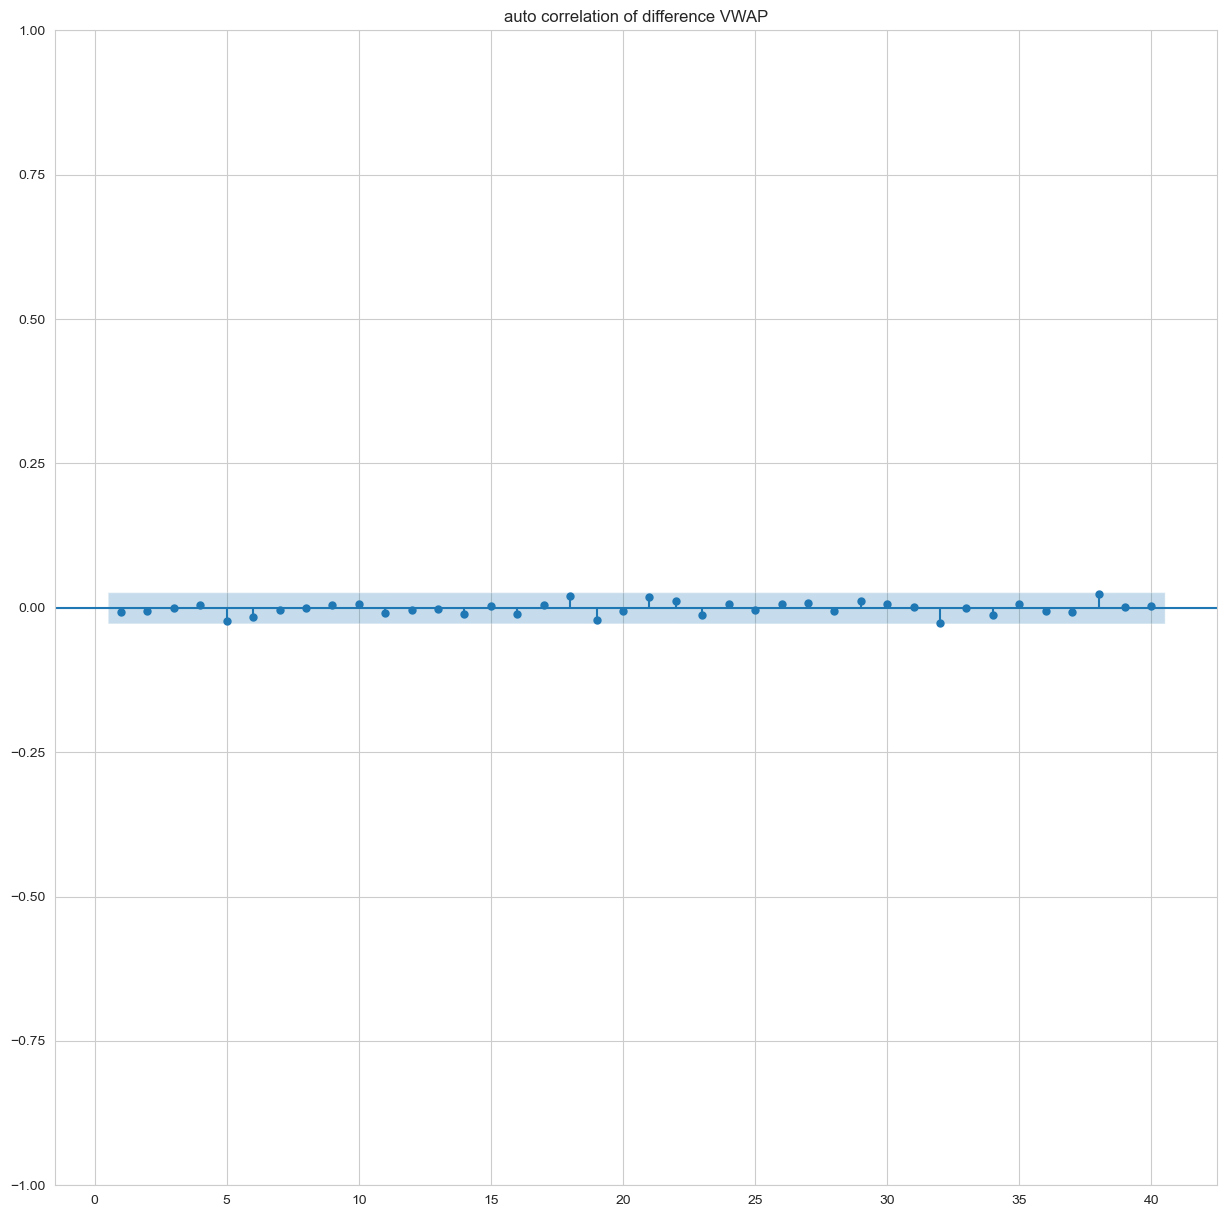

In [93]:
sm.graphics.tsa.plot_acf(hdfc_stationarity['Close First Difference'].iloc[7:], lags=40,title='auto correlation of difference VWAP',zero=False)
plt.show()

## Linear Regression

In [170]:
hdfc = hdfc.reset_index()

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
hdfc_lr= hdfc.copy()
hdfc_lr.drop('Date', axis = 1, inplace = True)
hdfc_lr.drop('Symbol', axis=1, inplace = True)
hdfc_lr.drop('Series', axis=1, inplace = True)
hdfc_lr.drop(['Trades','Deliverable Volume','%Deliverble'],axis=1,inplace=True)
X = hdfc_lr.drop('Close', axis=1)
y = hdfc_lr['Close']


In [172]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
# Train the Linear Regression Model
model.fit(X_train, y_train)

LinearRegression()

In [173]:
np.isnan(X.values.any())

False

In [174]:
preds = model.predict(X_test)
from sklearn.metrics import r2_score

# Evaluate the model's accuracy
accuracy = r2_score(y_test, preds)
print("Accuracy:", accuracy)

Accuracy: 0.9999800981584385


# AUTO ARIMA-Autoregressive Integrated Moving Average

ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

An ARIMA model is characterized by 3 terms: p, d, q

where,

* p is the order of the AR term
* q is the order of the MA term
* d is the number of differencing required to make the time series stationary

If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’.

In [175]:
ĥdfc = pd.read_csv(r"C:\Users\Subhajit Nath\Documents\DataSets\HDFCBANK.csv")
hdfc.set_index("Date", drop=False, inplace=True)
hdfc.head()

,level_0,index,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,,,
2000-01-03,0,0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
2000-01-04,1,1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2000-01-05,2,2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
2000-01-06,3,3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
2000-01-07,4,4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN


In [185]:
hdfc.reset_index(drop=True, inplace=True)

In [186]:
lag_features = ["High", "Low", "Volume", "Turnover", "Trades"]
window1 = 3
window2 = 7
window3 = 30

hdfc_rolled_3d = hdfc[lag_features].rolling(window=window1, min_periods=0)
hdfc_rolled_7d = hdfc[lag_features].rolling(window=window2, min_periods=0)
hdfc_rolled_30d = hdfc[lag_features].rolling(window=window3, min_periods=0)

hdfc_mean_3d = hdfc_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
hdfc_mean_7d = hdfc_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
hdfc_mean_30d = hdfc_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

hdfc_std_3d = hdfc_rolled_3d.std().shift(1).reset_index().astype(np.float32)
hdfc_std_7d = hdfc_rolled_7d.std().shift(1).reset_index().astype(np.float32)
hdfc_std_30d = hdfc_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    hdfc[f"{feature}_mean_lag{window1}"] = hdfc_mean_3d[feature]
    hdfc[f"{feature}_mean_lag{window2}"] = hdfc_mean_7d[feature]
    hdfc[f"{feature}_mean_lag{window3}"] = hdfc_mean_30d[feature]
    
    hdfc[f"{feature}_std_lag{window1}"] = hdfc_std_3d[feature]
    hdfc[f"{feature}_std_lag{window2}"] = hdfc_std_7d[feature]
    hdfc[f"{feature}_std_lag{window3}"] = hdfc_std_30d[feature]

hdfc.fillna(hdfc.mean(), inplace=True)

hdfc.set_index("Date", drop=False, inplace=True)
hdfc.head()

,level_0,index,Date,Symbol,Series,Prev Close,Open,High,Low,Last,...,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0,0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,...,82826.359375,82764.054688,82366.078125,9285.780273,11281.500977,13876.100586,1,1,3,0
2000-01-04,1,1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,...,82923.625000,82923.625000,82923.625000,9285.780273,11281.500977,13876.100586,1,1,4,1
2000-01-05,2,2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,...,82923.625000,82923.625000,82923.625000,0.000000,0.000000,0.000000,1,1,5,2
2000-01-06,3,3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,...,82923.625000,82923.625000,82923.625000,0.000000,0.000000,0.000000,1,1,6,3
2000-01-07,4,4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,...,82923.625000,82923.625000,82923.625000,0.000000,0.000000,0.000000,1,1,7,4


In [187]:
hdfc.Date = pd.to_datetime(hdfc.Date, format="%Y-%m-%d")
hdfc["month"] = hdfc.Date.dt.month
hdfc["week"] = hdfc.Date.dt.week
hdfc["day"] = hdfc.Date.dt.day
hdfc["day_of_week"] = hdfc.Date.dt.dayofweek
hdfc.head()

,level_0,index,Date,Symbol,Series,Prev Close,Open,High,Low,Last,...,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0,0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,...,82826.359375,82764.054688,82366.078125,9285.780273,11281.500977,13876.100586,1,1,3,0
2000-01-04,1,1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,...,82923.625000,82923.625000,82923.625000,9285.780273,11281.500977,13876.100586,1,1,4,1
2000-01-05,2,2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,...,82923.625000,82923.625000,82923.625000,0.000000,0.000000,0.000000,1,1,5,2
2000-01-06,3,3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,...,82923.625000,82923.625000,82923.625000,0.000000,0.000000,0.000000,1,1,6,3
2000-01-07,4,4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,...,82923.625000,82923.625000,82923.625000,0.000000,0.000000,0.000000,1,1,7,4


In [188]:
#Splitting the data into train and validation along with features.


hdfc_train = hdfc[hdfc.Date < "2020"]
hdfc_valid = hdfc[hdfc.Date >= "2020"]

In [189]:
exogenous_features = ["High_mean_lag3", "High_std_lag3", "Low_mean_lag3", "Low_std_lag3",
                      "Volume_mean_lag3", "Volume_std_lag3", "Turnover_mean_lag3",
                      "Turnover_std_lag3", "Trades_mean_lag3", "Trades_std_lag3",
                      "High_mean_lag7", "High_std_lag7", "Low_mean_lag7", "Low_std_lag7",
                      "Volume_mean_lag7", "Volume_std_lag7", "Turnover_mean_lag7",
                      "Turnover_std_lag7", "Trades_mean_lag7", "Trades_std_lag7",
                      "High_mean_lag30", "High_std_lag30", "Low_mean_lag30", "Low_std_lag30",
                      "Volume_mean_lag30", "Volume_std_lag30", "Turnover_mean_lag30",
                      "Turnover_std_lag30", "Trades_mean_lag30", "Trades_std_lag30",
                      "month", "week", "day", "day_of_week"]

In [190]:
model = auto_arima(hdfc_train.VWAP, exogenous=hdfc_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(hdfc_train.VWAP, exogenous=hdfc_train[exogenous_features])

forecast = model.predict(n_periods=len(hdfc_valid), exogenous=hdfc_valid[exogenous_features])
hdfc_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=50039.482, Time=2.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=50033.158, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=50033.737, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=50033.729, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=50031.337, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=50035.593, Time=0.34 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.268 seconds


In [191]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4974
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -25014.669
Date:                Thu, 30 Nov 2023   AIC                          50031.337
Time:                        13:41:22   BIC                          50037.849
Sample:                             0   HQIC                         50033.620
                               - 4974                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1369.3813      0.892   1534.934      0.000    1367.633    1371.130
===================================================================================
Ljung-Box (L1) (Q):                   1.42   Jarque-Bera (JB):         743928825.68
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):              16.09   Skew:                           -37.34
Prob(H) (two-sided):                  0.00   Kurtosis:                      1896.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [192]:
hdfc_valid.columns

Index(['level_0', 'index', 'Date', 'Symbol', 'Series', 'Prev Close', 'Open',
       'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades',
       'Deliverable Volume', '%Deliverble', 'High_mean_lag3', 'High_mean_lag7',
       'High_mean_lag30', 'High_std_lag3', 'High_std_lag7', 'High_std_lag30',
       'Low_mean_lag3', 'Low_mean_lag7', 'Low_mean_lag30', 'Low_std_lag3',
       'Low_std_lag7', 'Low_std_lag30', 'Volume_mean_lag3', 'Volume_mean_lag7',
       'Volume_mean_lag30', 'Volume_std_lag3', 'Volume_std_lag7',
       'Volume_std_lag30', 'Turnover_mean_lag3', 'Turnover_mean_lag7',
       'Turnover_mean_lag30', 'Turnover_std_lag3', 'Turnover_std_lag7',
       'Turnover_std_lag30', 'Trades_mean_lag3', 'Trades_mean_lag7',
       'Trades_mean_lag30', 'Trades_std_lag3', 'Trades_std_lag7',
       'Trades_std_lag30', 'month', 'week', 'day', 'day_of_week',
       'Forecast_ARIMAX'],
      dtype='object')

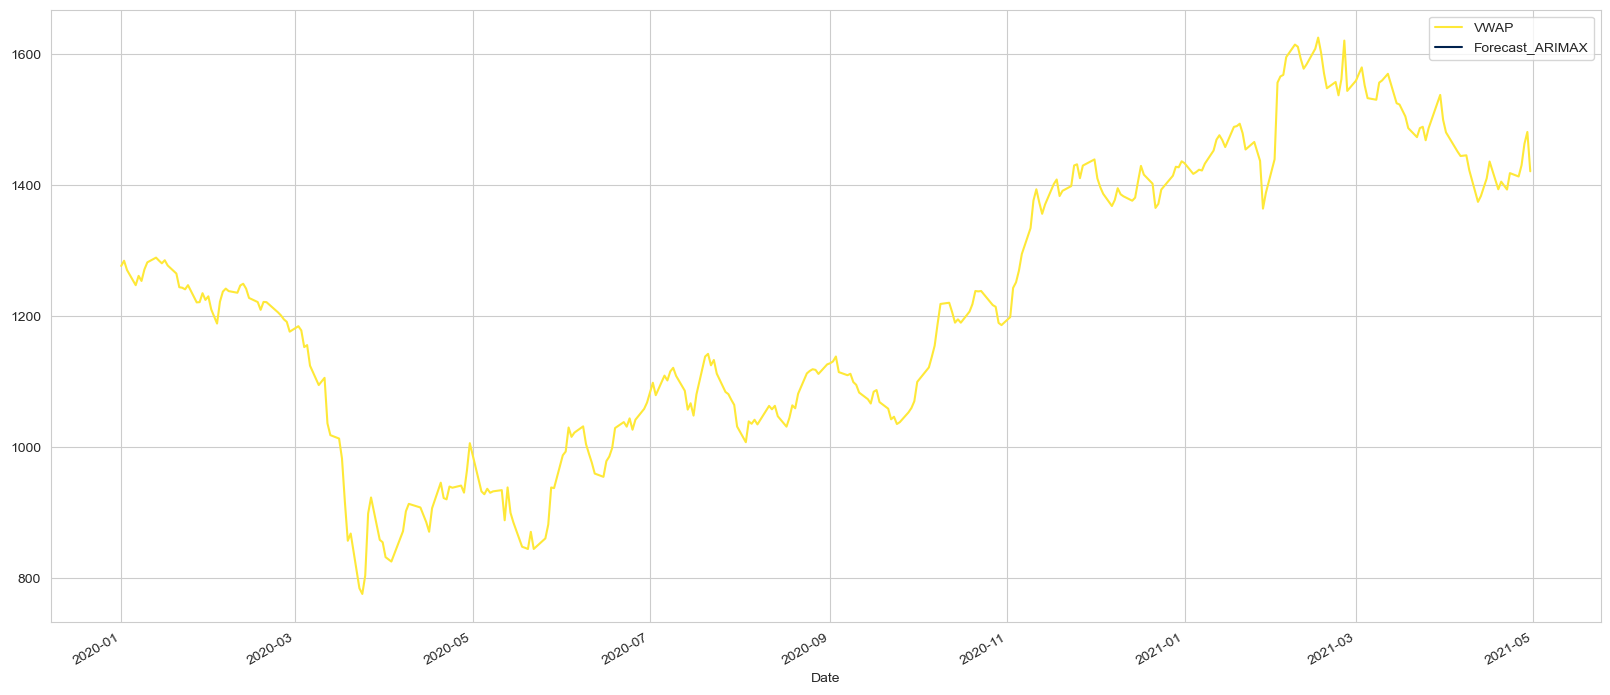

In [193]:
hdfc_valid[["VWAP", "Forecast_ARIMAX"]].plot(figsize=(20, 9), cmap='cividis_r');

In [195]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(hdfc_valid.VWAP, hdfc_valid.Close)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(hdfc_valid.VWAP, hdfc_valid.Close))

RMSE of Auto ARIMAX: 11.148382115588824

MAE of Auto ARIMAX: 8.079789156626505


# Fb Prophet

Facebook developed an open sourcing Prophet, a forecasting tool available in both Python and R. It provides intuitive parameters which are easy to tune. Even someone who lacks deep expertise in time-series forecasting models can use this to generate meaningful predictions for a variety of problems in business scenarios.

In [198]:
model_fbp = Prophet()
for feature in exogenous_features:
    model_fbp.add_regressor(feature)

model_fbp.fit(hdfc_train[["Date", "VWAP"] + exogenous_features].rename(columns={"Date": "ds", "VWAP": "y"}))

forecast = model_fbp.predict(hdfc_valid[["Date", "VWAP"] + exogenous_features].rename(columns={"Date": "ds"}))
hdfc_valid["Forecast_Prophet"] = forecast.yhat.values

13:44:19 - cmdstanpy - INFO - Chain [1] start processing
13:44:24 - cmdstanpy - INFO - Chain [1] done processing


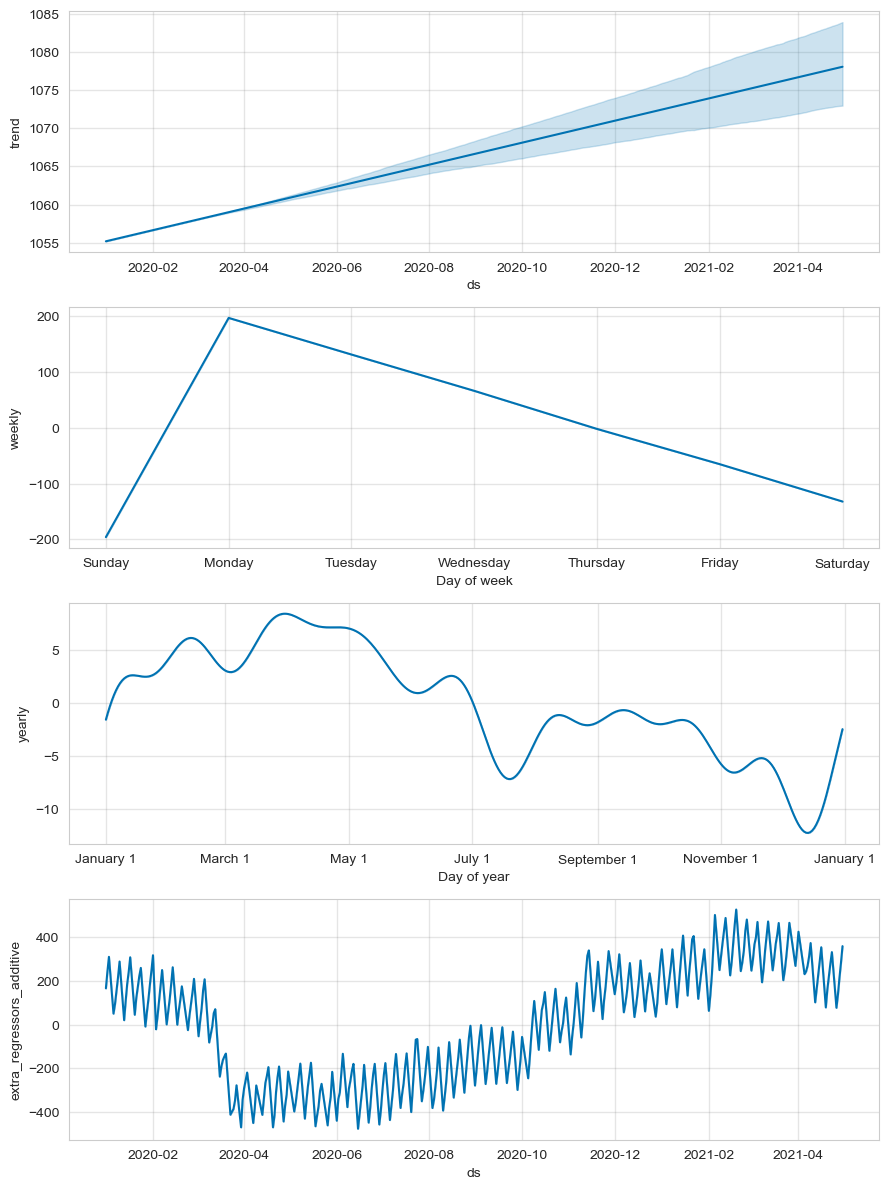

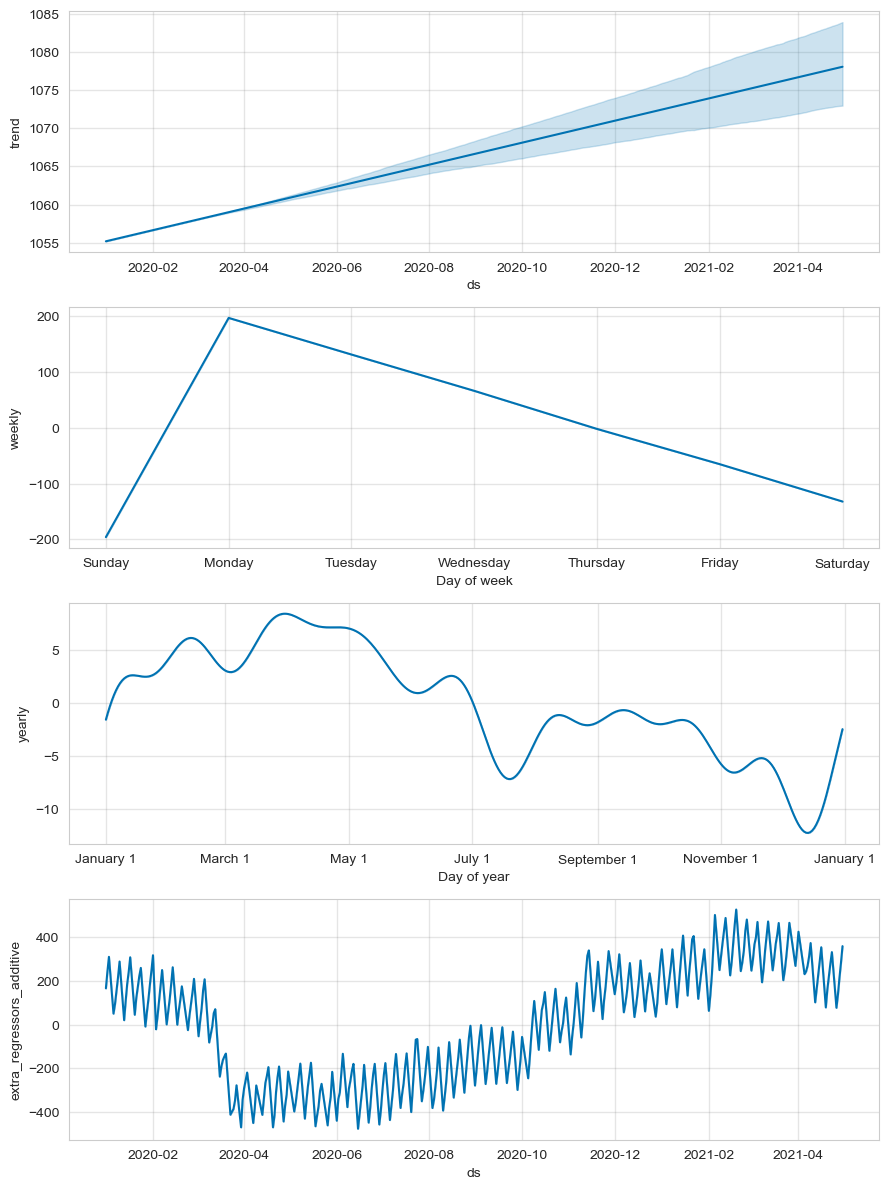

In [199]:
model_fbp.plot_components(forecast)

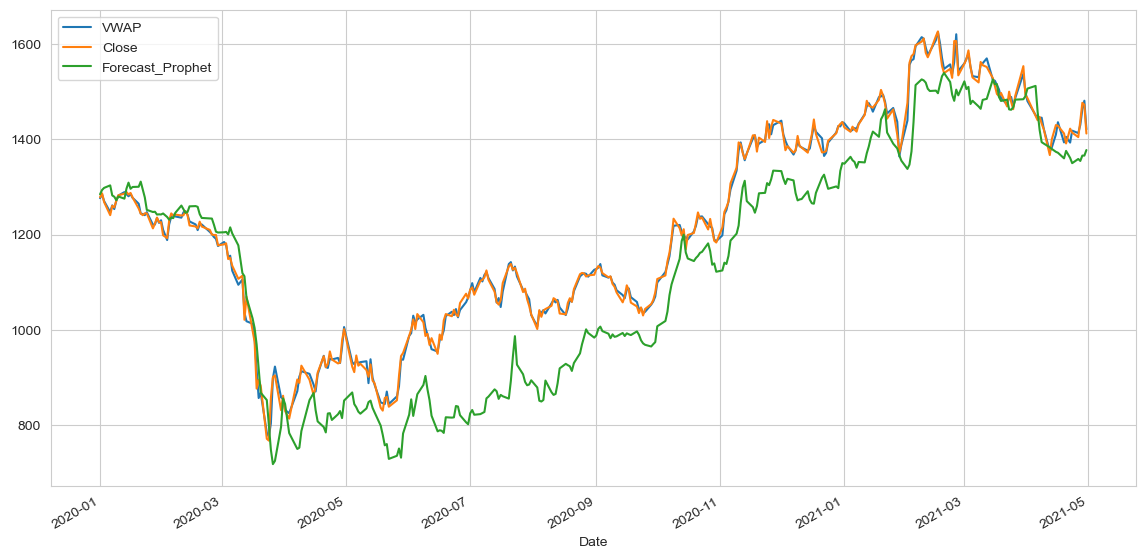

In [200]:
hdfc_valid[["VWAP", "Close", "Forecast_Prophet"]].plot(figsize=(14, 7));

In [201]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(hdfc_valid.VWAP, hdfc_valid.Close)))
print("RMSE of Prophet:", np.sqrt(mean_squared_error(hdfc_valid.VWAP, hdfc_valid.Forecast_Prophet)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(hdfc_valid.VWAP, hdfc_valid.Close))
print("MAE of Prophet:", mean_absolute_error(hdfc_valid.VWAP, hdfc_valid.Forecast_Prophet))

RMSE of Auto ARIMAX: 11.148382115588824
RMSE of Prophet: 113.03537686317105

MAE of Auto ARIMAX: 8.079789156626505
MAE of Prophet: 92.3991929269304


## Conclusion
From the analysis, we can understand what are all the factors which is being undergone while working on a time-series project. Time series result's aren't the supreme way to tell accurate results as anything can happen to worsen or brighten up the stock market and the predictions aren't 100% reliable

### Thank you for reading my notebook.